# Building a CABLE NEWS NETWORK

In [2]:
import os
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
import numpy as np
import annabel_data_creation as anna
import cnn_functions as cnn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
layers = tf.keras.layers

In [4]:
#uploading ATTPC data image file and separating it into events (128x128 images) and targets (labels 0, 1, and 2)
imgs = h5py.File('ATTPC_images', 'r')
events = np.asarray(imgs['imgs'])
targets = np.asarray(imgs['targets'])
#print(evts.shape, track.shape)

In [5]:
#normalizing the images so that the values are between -1 and 1
events = abs(events - 255) / 255
#adding a 3-value third dimension to each image so the model can accept it
events = np.expand_dims(events, axis=3)
events = np.repeat(events, 3, axis=3)

# Some checks to make sure the data has been correctly preprocessed
#assert events.shape[1:] == (128, 128, 3), 'Real data has incorrect shape'
#assert events.min() >= -1 and events.max() <= 1, 'Real data is not in the range [-1, 1]'

In [7]:
#plt.imshow(events[1,:,:,1])  #move around each line to see how data is affected
#print(events[0,60:70,60:70,1])

In [19]:
#shuffling the data and splitting it into training and testing sets
train_events, test_events, train_targets, test_targets = train_test_split(events, targets, test_size=0.25, random_state=24)
print(train_events.shape, test_events.shape, train_targets.shape, test_targets.shape)

input_shape = train_events.shape[1:]  #should be (128, 128, 3)
num_classes = len(np.unique(train_targets))   #should be 3
print(targets[0])

(15000, 128, 128, 3) (5000, 128, 128, 3) (15000,) (5000,)
0


In [16]:
#builds and compiles a model with the given specifications
model = cnn.build_pretrained_vgg_model(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
#checkpointing weights for each epoch
cp_dir = './model-checkpoints/'

if not os.path.exists(cp_dir):   #makes the directory if it doesn't exist
    os.makedirs(cp_dir)
    
cp_path = os.path.join(cp_dir, 'weights.epoch.{epoch:02d}')
cp_callback = tf.keras.callbacks.ModelCheckpoint(cp_path, save_weights_only=True)

Epoch 1/20
375/375 [==============================] - 9s 23ms/step - loss: 1.0676 - accuracy: 0.4672 - val_loss: 1.0599 - val_accuracy: 0.4937
Epoch 2/20
375/375 [==============================] - 8s 20ms/step - loss: 1.0409 - accuracy: 0.5033 - val_loss: 1.0475 - val_accuracy: 0.4937
Epoch 3/20
375/375 [==============================] - 8s 20ms/step - loss: 1.0440 - accuracy: 0.4972 - val_loss: 1.0489 - val_accuracy: 0.4937
Epoch 4/20
375/375 [==============================] - 8s 21ms/step - loss: 1.0420 - accuracy: 0.5029 - val_loss: 1.0498 - val_accuracy: 0.4937
Epoch 5/20
375/375 [==============================] - 8s 21ms/step - loss: 1.0396 - accuracy: 0.5027 - val_loss: 1.0443 - val_accuracy: 0.4937
Epoch 6/20
375/375 [==============================] - 8s 21ms/step - loss: 1.0426 - accuracy: 0.4977 - val_loss: 1.0436 - val_accuracy: 0.4937
Epoch 7/20
375/375 [==============================] - 8s 21ms/step - loss: 1.0418 - accuracy: 0.4984 - val_loss: 1.0489 - val_accuracy: 0.4937

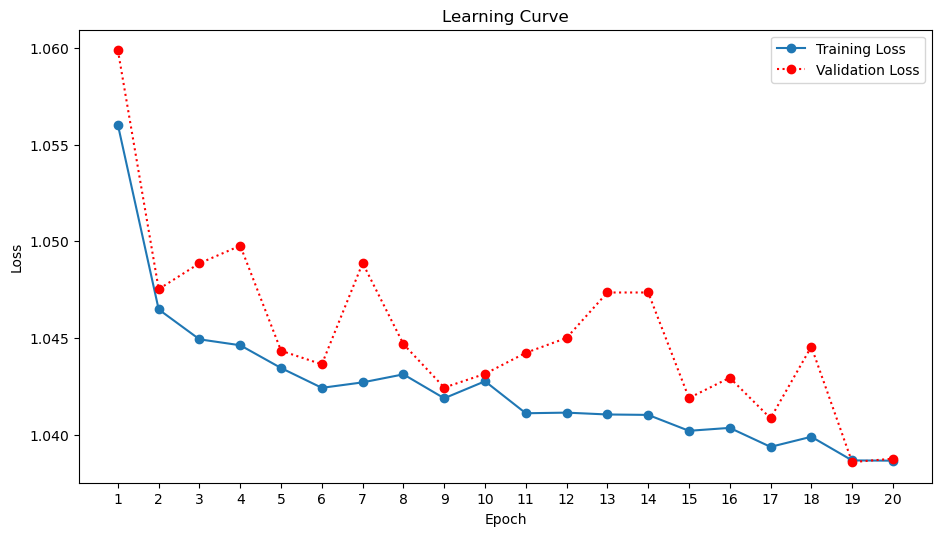

In [18]:
#training the model and plotting its learning curve
history = model.fit(train_events, train_targets, batch_size=32, epochs=20, validation_split=0.2, callbacks=[cp_callback])
cnn.plot_learning_curve(history)

In [ ]:
#evaluating the model at the optimal epoch
best_epoch = 5
best_cp_path = os.path.join(cp_dir, 'weights.epoch.{:02d}'.format(best_epoch))
model.load_weights(best_cp_path)

test_loss, test_accuracy = model.evaluate(test_events, test_targets, verbose=0)
print('Test accuracy: {:.04}'.format(test_accuracy))

In [ ]:
predicted_probabilities = model.predict(real_features)
predictions = np.argmax(predicted_probabilities, axis=1)
class_names = ['bea,', 'two track', 'three track']

cnn.plot_confusion_matrix(real_targets, predictions, class_names)